In [71]:
#For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

#Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

#1) Show the dataframe shape.

import pandas as pd 
import numpy as np

In [72]:
!ls

Lab Customer Analysis Round 3_W1_D3.ipynb
files_for_lab
readme.md


In [73]:
marketing_customer_analysis = pd.read_excel('files_for_lab/excel_files/marketing_customer_analysis.xlsx')

In [74]:
marketing_customer_analysis.shape

(10910, 26)

In [75]:
#2) Standardize header names.

display(marketing_customer_analysis.columns)

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [76]:
cols = []
for i in range(len(marketing_customer_analysis.columns)):
    cols.append(marketing_customer_analysis.columns[i].lower())
marketing_customer_analysis.columns = cols

In [77]:
display(marketing_customer_analysis.columns)

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [78]:
marketing_customer_analysis.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [79]:
#3) Which columns are numerical? Which columns are categorical?

marketing_customer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10279 non-null  object        
 3   customer lifetime value        10910 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective to date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location code  

In [80]:
#4) Check and deal with NaN values.

#measure the sum of NaN values with the function: print(df.isna().sum())
print(marketing_customer_analysis.isna().sum())

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [81]:
marketing_customer_analysis.shape

(10910, 26)

In [82]:
marketing_customer_analysis.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [83]:
display('state', marketing_customer_analysis['state'].unique())
display('response',marketing_customer_analysis['response'].unique())

'state'

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

'response'

array(['No', 'Yes', nan], dtype=object)

In [84]:
#Desition for numerical values. Stats Description. 

#' months since last claim stats:' 
print('months since last claim stats:')
display(marketing_customer_analysis['months since last claim'].describe())
print("NaN ", marketing_customer_analysis['months since last claim'].isna().sum())
print("NaN / Total: ",round(marketing_customer_analysis['months since last claim'].isna().sum()/marketing_customer_analysis['months since last claim'].count()*100,2),"%")

months since last claim stats:


count    10277.000000
mean        15.149071
std         10.080349
min          0.000000
25%          6.000000
50%         14.000000
75%         23.000000
max         35.000000
Name: months since last claim, dtype: float64

NaN  633
NaN / Total:  6.16 %


In [85]:
# in this case because the Std is relatively high, is not recomendable to replace with the mean or mode values. Other aproach that is not jet teach should be applied, like interpolation or regression. For This excercie i will apply mean. 

mean_mslc = marketing_customer_analysis['months since last claim'].mean()

marketing_customer_analysis['months since last claim'] = marketing_customer_analysis['months since last claim'].fillna(mean_mslc)    

In [86]:
marketing_customer_analysis['months since last claim'].isna().sum()

0

In [87]:
# Dealing with: number of open complaints
# Stats

print('number of open complaints:')
display(marketing_customer_analysis['number of open complaints'].describe())
print("NaN ", marketing_customer_analysis['number of open complaints'].isna().sum())
print("NaN / Total: ",round(marketing_customer_analysis['number of open complaints'].isna().sum()/marketing_customer_analysis['number of open complaints'].count()*100,2),"%")

number of open complaints:


count    10277.000000
mean         0.384256
std          0.912457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: number of open complaints, dtype: float64

NaN  633
NaN / Total:  6.16 %


In [88]:
#in this case i will replace the missing values with the value 0, assuming that the NaN represent no Complaints. 

marketing_customer_analysis['number of open complaints'] = marketing_customer_analysis['number of open complaints'].fillna(0)    


marketing_customer_analysis['number of open complaints'].isna().sum()

0

In [89]:
print(marketing_customer_analysis.isna().sum())
display(marketing_customer_analysis.info())

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

None

In [90]:
# Now i just have "object" columns types to replace

# Dealing with 'Response': 

display('response',marketing_customer_analysis['response'].unique())

'response'

array(['No', 'Yes', nan], dtype=object)

In [91]:
marketing_customer_analysis['response'].mode()
display(marketing_customer_analysis['response'].describe())

count     10279
unique        2
top          No
freq       8813
Name: response, dtype: object

In [92]:
# In this case i will replace NaN for the Mode that is No 8813 in 10279 times. 

marketing_customer_analysis['response'] = marketing_customer_analysis['response'].fillna("No")    


marketing_customer_analysis['response'].isna().sum()

0

In [93]:
# Dealing with State: 

#Is not possible to replace with any value and it feels like an imporatnt value, it will be better to erase the NaN

marketing_customer_analysis = marketing_customer_analysis[marketing_customer_analysis['state'].isna()==False]


In [94]:
display(marketing_customer_analysis.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10279 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     10279 non-null  int64         
 1   customer                       10279 non-null  object        
 2   state                          10279 non-null  object        
 3   customer lifetime value        10279 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10279 non-null  object        
 6   education                      10279 non-null  object        
 7   effective to date              10279 non-null  datetime64[ns]
 8   employmentstatus               10279 non-null  object        
 9   gender                         10279 non-null  object        
 10  income                         10279 non-null  int64         
 11  location code  

None

In [95]:
print(marketing_customer_analysis.isna().sum())

unnamed: 0                          0
customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     591
vehicle size                      591
vehicle type                     5164
dtype: int64

In [96]:
display('vehicle class',marketing_customer_analysis['vehicle class'].unique())
display('vehicle size ',marketing_customer_analysis['vehicle size'].unique())

'vehicle class'

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

'vehicle size '

array(['Medsize', 'Small', 'Large', nan], dtype=object)

In [97]:
# Dealing with 'vehicle class'
print("NaN / Total: ",round(marketing_customer_analysis['vehicle class'].isna().sum()/marketing_customer_analysis['vehicle class'].count()*100,2),"%")


NaN / Total:  6.1 %


In [98]:
#Is not possible to replace with any value, as theu are not so many, 6,1% , it will be better to erase the NaN

marketing_customer_analysis = marketing_customer_analysis[marketing_customer_analysis['vehicle class'].isna()==False]


In [99]:
print(marketing_customer_analysis.isna().sum())

unnamed: 0                          0
customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                       0
vehicle size                        0
vehicle type                     4869
dtype: int64

In [100]:
#Dealing whit 'vehicle type'

display('vehicle type',marketing_customer_analysis['vehicle type'].unique())

'vehicle type'

array([nan, 'A'], dtype=object)

In [101]:
#It seems that the only tipe is vahicle type A, i will replace NaN with "A" (it will be better to confirm with the people that know about the car types on the cmpany first)


marketing_customer_analysis['vehicle type'] = marketing_customer_analysis['vehicle type'].fillna("A")    


marketing_customer_analysis['vehicle type'].isna().sum()

0

In [102]:
display(marketing_customer_analysis.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9688 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     9688 non-null   int64         
 1   customer                       9688 non-null   object        
 2   state                          9688 non-null   object        
 3   customer lifetime value        9688 non-null   float64       
 4   response                       9688 non-null   object        
 5   coverage                       9688 non-null   object        
 6   education                      9688 non-null   object        
 7   effective to date              9688 non-null   datetime64[ns]
 8   employmentstatus               9688 non-null   object        
 9   gender                         9688 non-null   object        
 10  income                         9688 non-null   int64         
 11  location code   

None

In [103]:
marketing_customer_analysis.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A


In [104]:
#5) Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [105]:
marketing_customer_analysis['month'] = marketing_customer_analysis['effective to date'].dt.month_name()

marketing_customer_analysis.head()


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,February
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,January
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,January


In [106]:
marketing_customer_analysis['month'].unique()

array(['February', 'January'], dtype=object)

In [107]:
# In this case the filter of the first quarter is not really necesary because all the dates are Between: January and March. 
#If anyway i would have to do it i will do it like this:

In [108]:
marketing_customer_analysis[(marketing_customer_analysis['month'].isin(['January','February','March']))]

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,February
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,January
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,February
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,February


In [109]:
#6) BONUS: Put all the previously mentioned data transformations into a function.

In [110]:
# Lab Customer Analysis Round 3

In [111]:
#new file seems to be differents from the one we use before. so i made a copy of the one before, naming this new as marketing_customer_analysis_v2
marketing_customer_analysis_v2 = pd.read_excel('files_for_lab/excel_files/marketing_customer_analysis_v2.xlsx')
print("File v2: ",marketing_customer_analysis_v2.shape)
print("File v1: ",marketing_customer_analysis.shape)
print("Inicial v1: (10910, 26)")

#i will continue working with the inicial file. 

File v2:  (9134, 24)
File v1:  (9688, 27)
Inicial v1: (10910, 26)


In [112]:
#Show DataFrame info.
#Describe DataFrame.

display(marketing_customer_analysis.info())
display(marketing_customer_analysis.describe())
display(marketing_customer_analysis.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9688 entries, 0 to 10908
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     9688 non-null   int64         
 1   customer                       9688 non-null   object        
 2   state                          9688 non-null   object        
 3   customer lifetime value        9688 non-null   float64       
 4   response                       9688 non-null   object        
 5   coverage                       9688 non-null   object        
 6   education                      9688 non-null   object        
 7   effective to date              9688 non-null   datetime64[ns]
 8   employmentstatus               9688 non-null   object        
 9   gender                         9688 non-null   object        
 10  income                         9688 non-null   int64         
 11  location code   

None

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000
mean,5475.146367,7996.180571,37551.325764,93.276012,15.099978,48.067506,0.362407,2.975330,435.414790
std,3149.338222,6832.516819,30357.895578,34.401086,9.780979,27.920964,0.888463,2.395177,291.625605
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2753.750000,4013.921611,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,272.010666
50%,5492.500000,5786.493980,33802.500000,83.000000,15.000000,48.000000,0.000000,2.000000,384.000000
75%,8206.250000,8984.682679,62259.000000,109.000000,23.000000,71.000000,0.000000,4.000000,550.902485
max,10908.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,February
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,January
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,January


In [113]:
#Show a plot of the total number of responses.
total_response = marketing_customer_analysis['response'].value_counts()
print(total_response)
type(total_response)


No     8308
Yes    1380
Name: response, dtype: int64


pandas.core.series.Series

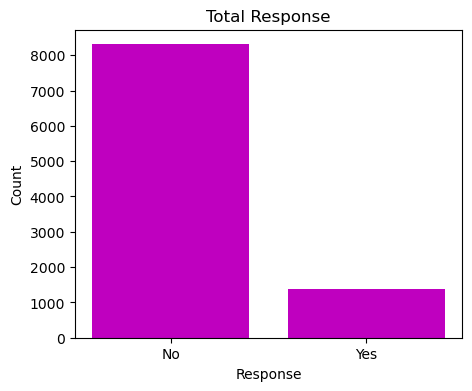

No     8308
Yes    1380
Name: response, dtype: int64

In [114]:
import matplotlib.pyplot as plt

total_response = marketing_customer_analysis['response'].value_counts()
plt.figure(figsize =(5,4))
plt.bar(total_response.index, total_response.values, color="m")
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Total Response')
plt.show()

display(total_response)

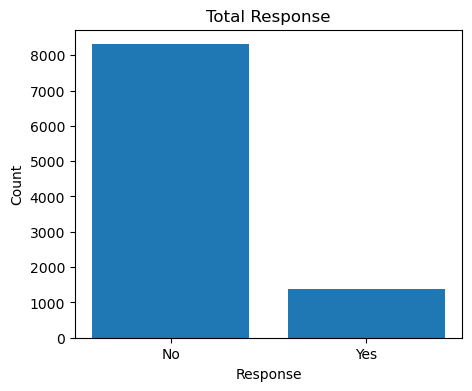

In [115]:
#Other way:

fig,ax = plt.subplots(figsize=(5,4))
ax.bar(total_response.index,total_response.values)
ax.set_xlabel("Response")
ax.set_ylabel('Count')
ax.set_title('Total Response')
plt.show()

In [116]:
#Show a plot of the response rate by the sales channel.

#need to make a DataFrame that contain the response rate by channel. 
    #what is the response rate --> Yes/Total
    
yes_response = marketing_customer_analysis[marketing_customer_analysis['response']=="Yes"]

yes_response 



,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
8,8,FM55990,California,5989.773931,Yes,Premium,College,2011-01-19,Employed,M,...,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,A,January
15,15,CW49887,California,4626.801093,Yes,Basic,Master,2011-01-16,Employed,F,...,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,A,January
19,19,NJ54277,California,3746.751625,Yes,Extended,College,2011-02-26,Employed,F,...,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A,February
27,27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2011-02-28,Employed,F,...,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,A,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,10840,ME22430,Nevada,2453.570794,Yes,Basic,Bachelor,2011-02-09,Medical Leave,M,...,1,Personal Auto,Personal L2,Offer1,Agent,331.200000,Four-Door Car,Medsize,A,February
10844,10844,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2011-02-07,Employed,F,...,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize,A,February
10872,10872,XT67997,California,5979.724161,Yes,Extended,High School or Below,2011-02-07,Employed,F,...,3,Personal Auto,Personal L3,Offer2,Agent,547.200000,Four-Door Car,Medsize,A,February
10887,10887,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2011-02-03,Employed,F,...,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small,A,February


In [117]:
yes_response_channel = yes_response['sales channel'].value_counts()
yes_response_channel

Agent          701
Branch         307
Call Center    203
Web            169
Name: sales channel, dtype: int64

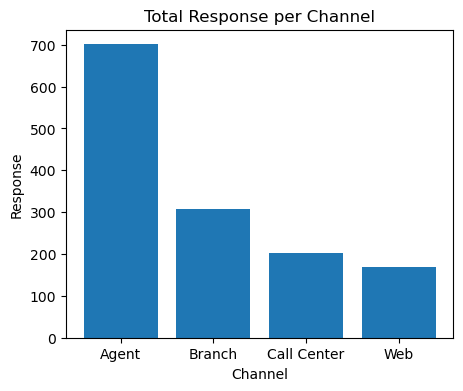

In [118]:
fig,ax = plt.subplots(figsize=(5,4))
ax.bar(yes_response_channel.index,yes_response_channel.values)
ax.set_xlabel("Channel")
ax.set_ylabel('Response')
ax.set_title('Total Response per Channel')
ax.set
plt.show()

In [119]:
#Show a plot of the response rate by the total claim amount.

#I dont really undersdtand the idea of this plot

In [120]:
# Show a plot of the response rate by income. 

# the first file didnt have income column, so now i use marketing_customer_analysis_v2

In [121]:
!ls 

Lab Customer Analysis Round 3_W1_D3.ipynb
files_for_lab
readme.md


In [122]:
marketing_customer_analysis_v2.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [123]:
marketing_customer_analysis_v2.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [124]:
marketing_customer_analysis_v2['Income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64

In [125]:
Income = marketing_customer_analysis_v2['Income']

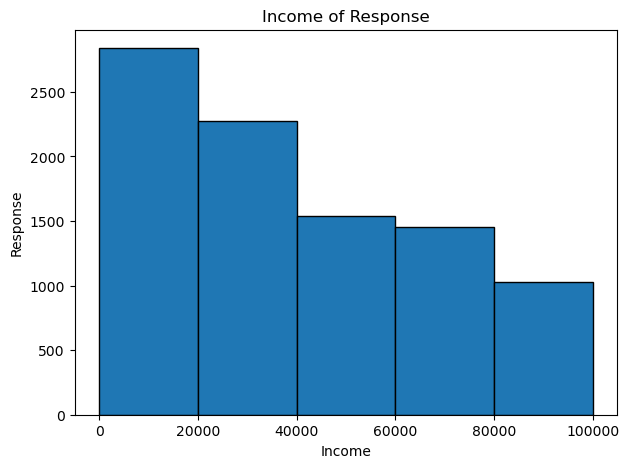

In [126]:
fig, ax = plt.subplots(figsize = (7, 5))

ax.hist(Income, bins=5, edgecolor="black")
ax.set_xlabel("Income")
ax.set_ylabel('Response')
ax.set_title('Income of Response')
ax.set
plt.show()

In [127]:
#Check if this plot make any sense: 

#df.loc[df['Income'] < 20000].count()

marketing_customer_analysis_v2[marketing_customer_analysis_v2['Income']<20000].shape[0]

2839